### Classical search

In [22]:
import random
import numpy as np

trials = []
for _ in range(10000):
    winning_number = 42
    numbers = random.sample(range(0, 101), 101)

    def oracle(number):
        return number == winning_number

    for index, num in enumerate(numbers):
        if oracle(num):
            trials.append(index + 1)
            break
    
#search is O(n)
print(np.mean(trials))

50.9451


In [23]:
from qiskit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
from qiskit.visualization import plot_histogram

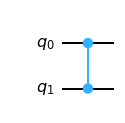

In [24]:
oracleCircuit = QuantumCircuit(2, name="oracleCircuit")
oracleCircuit.cz(0, 1)
oracleCircuit.to_gate()
oracleCircuit.draw(output="mpl")


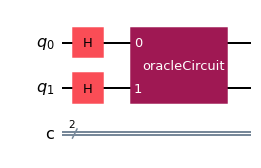

In [25]:
mainCircuit = QuantumCircuit(2, 2)
mainCircuit.h([0, 1])
mainCircuit.append(oracleCircuit,[0, 1])
mainCircuit.draw(output="mpl")

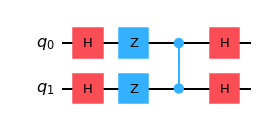

In [26]:
reflectionCircuit = QuantumCircuit(2, name="reflectionCircuit")
reflectionCircuit.h([0, 1])
reflectionCircuit.z([0, 1])
reflectionCircuit.cz(0, 1)
reflectionCircuit.h([0, 1])
reflectionCircuit.to_gate()
reflectionCircuit.draw(output="mpl")

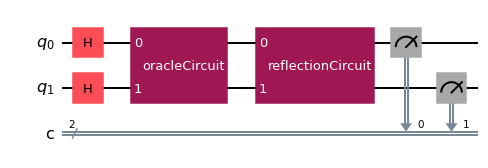

In [27]:
mainCircuit.append(reflectionCircuit, [0, 1])
mainCircuit.measure([0, 1], [0, 1])
mainCircuit.draw(output="mpl")

/home/henning/.local/lib/python3.10/site-packages/qiskit_ibm_runtime/fake_provider/fake_backend.py:468: RuntimeWarning: Aer not found, using qiskit.BasicSimulator and no noise.
  warnings.warn(


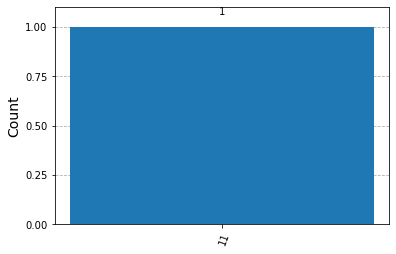

In [29]:
backend = FakeManilaV2()
sampler = Sampler(mode=backend)

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(mainCircuit)

job = sampler.run([isa_circuit], shots=1)
result = job.result()
pub_result = result[0]

plot_histogram(pub_result.data.c.get_counts())